<a href="https://colab.research.google.com/github/mmccleeseschool/Intro-to-machine-Learning/blob/main/McCleese_Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-63-a7b747b3d81a>:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=sample_df, x=feature, y='target', color='purple',
<ipython-input-63-a7b747b3d81a>:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=sample_df, x=feature, y='target', color='purple',
<ipython-input-63-a7b747b3d81a>:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=sample_df, x=feature, y='target', color='purple',
<ipython-input-63-a7b747b3d81a>:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=sample_df, x=feature, y='target', color='purple',
<ipython-input-63-a7b747b3d81a>:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=sample_df, x=feature, y='target', color='purple',
<ipython-input-63-a7b747b3d81a>:38: UserWarning: Ignoring `palette` be

(331, 10)
(111, 10)
       age: -60.21981405677291
       sex: -266.45705232203574
       bmi: 523.0634112596993
        bp: 310.5134699670048
        s1: -336.1614738106944
        s2: 137.3392923842451
        s3: -131.13923283453653
        s4: -1.1492348017315557
        s5: 622.3286855688128
        s6: 60.466457691682535
[115.46474836  83.4585369  160.77727376 187.65710274  72.72122197]
[ 79.  55. 109. 178.  39.]
0.5322429620529407
3458.2307025173577
LinearRegression: mean of r2 scores=0.475
      ElasticNet: mean of r2 scores=-0.002
           Lasso: mean of r2 scores=0.339
           Ridge: mean of r2 scores=0.421


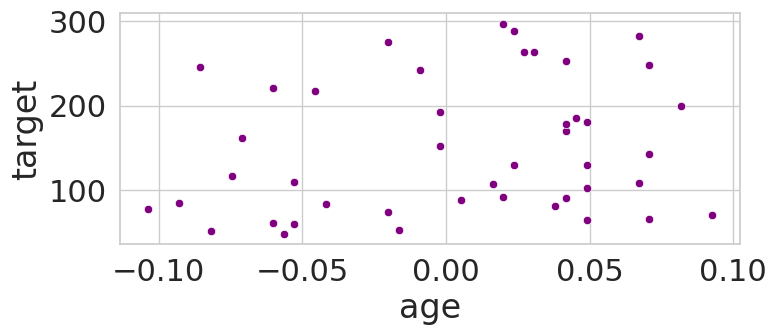

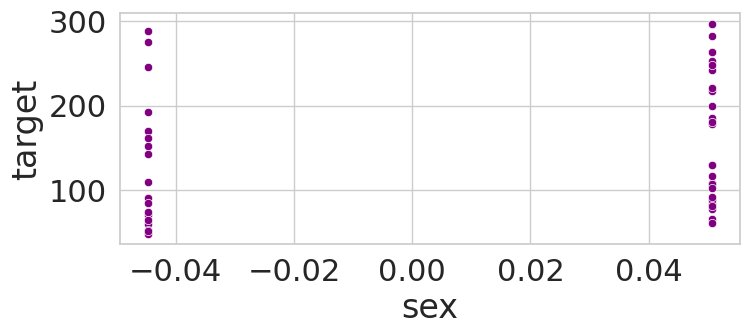

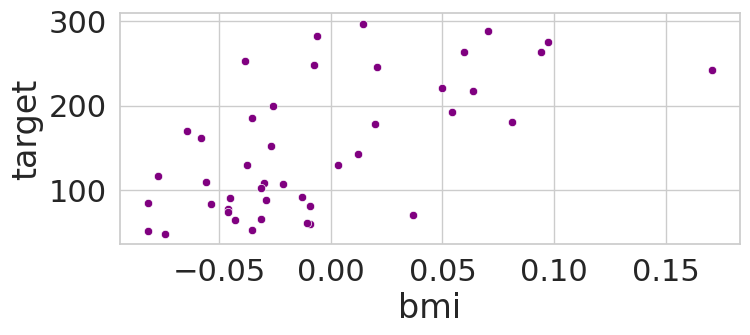

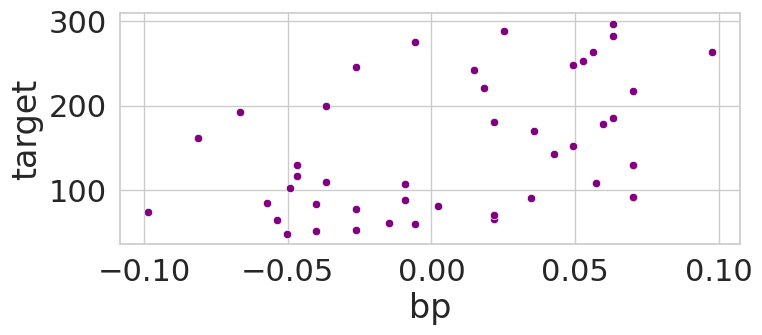

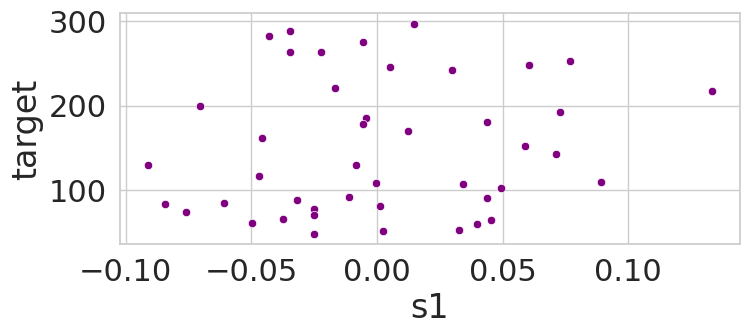

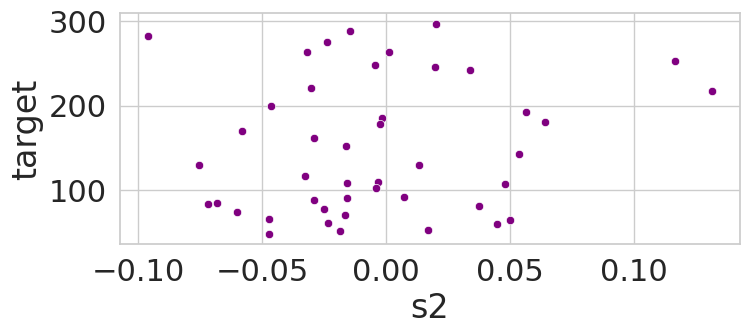

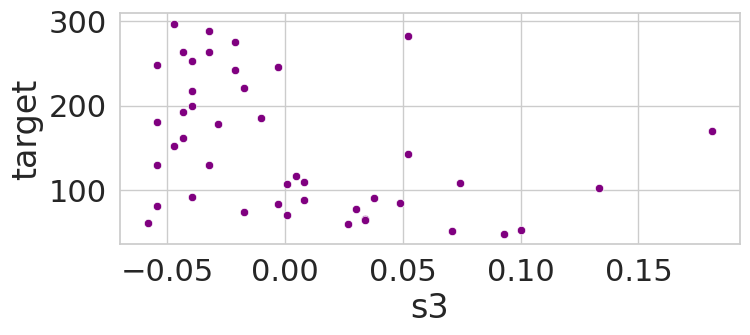

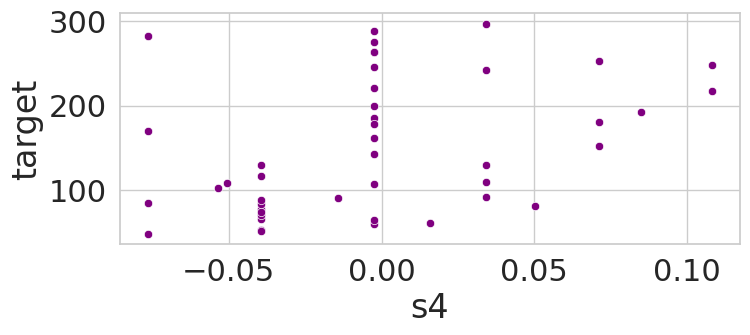

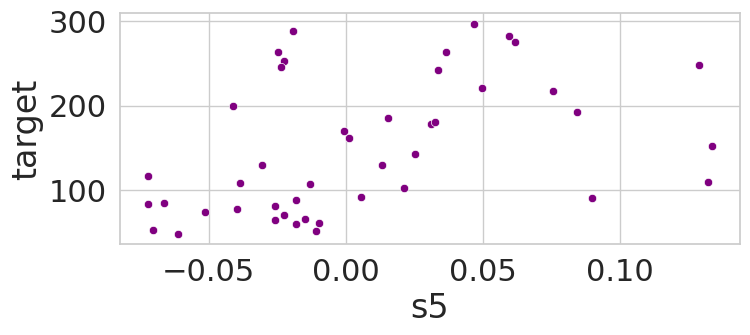

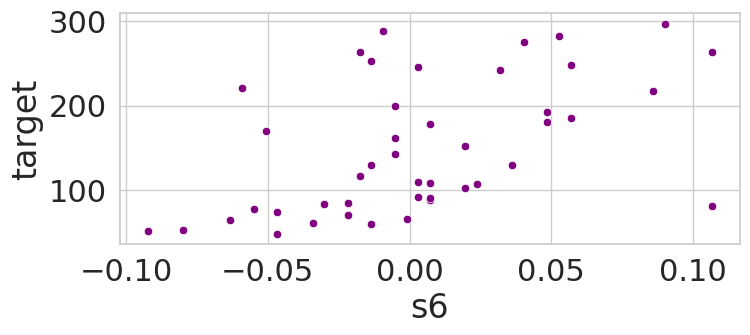

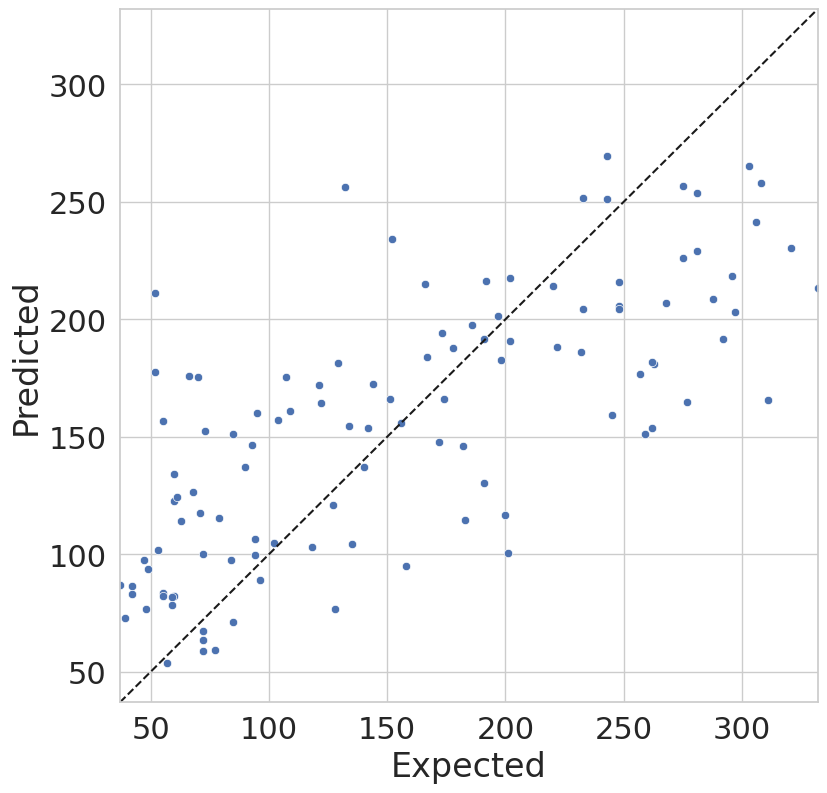

In [63]:
%matplotlib inline
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

#print(diabetes.DESCR)

#print(diabetes.data.shape)

#print(diabetes.target.shape)

#print(diabetes.feature_names)

import pandas as pd

pd.set_option('display.precision', 6)
pd.set_option('display.max_columns', 11)
pd.set_option('display.width', None)

diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

diabetes_df['target'] = pd.Series(diabetes.target)

diabetes_df.head()

diabetes_df.describe()

sample_df = diabetes_df.sample(frac=0.1, random_state=17)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale = 2)
sns.set_style('whitegrid')

for feature in diabetes.feature_names:
  plt.figure(figsize=(8, 3))
  sns.scatterplot(data=sample_df, x=feature, y='target', color='purple',
                  palette='cool', legend=False)


from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target,
                                                    random_state=11)

print(x_train.shape)
print(x_test.shape)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train, y_train)

for i, name in enumerate(diabetes.feature_names):
  print(f'{name:>10}: {lr.coef_[i]}')

lr.intercept_

predicted = lr.predict(x_test)

expected = y_test

print(predicted[:5])

print(expected[:5])


df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(9, 9))
axes = sns.scatterplot(data=df, x='Expected', y='Predicted',
                       legend=False)

start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())
axes.set_xlim(start, end)
axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')


from sklearn import metrics

print(metrics.r2_score(expected, predicted))
print(metrics.mean_squared_error(expected, predicted))

from sklearn.linear_model import ElasticNet, Lasso, Ridge

estimators = {
    'LinearRegression': lr,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

from sklearn.model_selection import KFold, cross_val_score

for estimator_name, estimator_object in estimators.items():
  kfold = KFold(n_splits=10, random_state=11, shuffle=True)
  scores = cross_val_score(estimator=estimator_object,
                           X=diabetes.data, y=diabetes.target,
                           cv=kfold, scoring='r2')
  print(f'{estimator_name:>16}: ' +
        f'mean of r2 scores={scores.mean():.3f}')


